# **Persiapan & Import Library**

**Persiapan & Import Library**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Mengatur gaya visualisasi
sns.set_theme(style="whitegrid")

# Load Dataset Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("Dataset berhasil dimuat!")

Dataset berhasil dimuat!


## **BAGIAN A — Eksplorasi Data Awal**

1. Informasi Dataset & 2. Statistik Deskriptif

In [2]:
# 1. Informasi Dataset
print("=== INFORMASI DATASET ===")
print(f"Jumlah data: {df.shape[0]}")
print(f"Jumlah variabel: {df.shape[1]} (termasuk target)")
print("\nTipe data tiap variabel:")
print(df.dtypes)
print("\nJumlah masing-masing spesies:")
print(df['species'].value_counts())

# 2. Statistik Deskriptif
print("\n=== STATISTIK DESKRIPTIF ===")
display(df.describe())

=== INFORMASI DATASET ===
Jumlah data: 150
Jumlah variabel: 5 (termasuk target)

Tipe data tiap variabel:
sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

Jumlah masing-masing spesies:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

=== STATISTIK DESKRIPTIF ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


***Penjelasan***

1. **Informasi Dataset Jumlah Data & Variabel:**  Dataset ini terdiri dari total 150 baris data dan 5 variabel (4 fitur pengukuran dan 1 variabel target/label).

**Tipe Data:** Keempat fitur pengukuran (sepal length, sepal width, petal length, petal width) bertipe data numerik desimal (float64). Sedangkan variabel target (species) bertipe kategori (category atau object).

**Jumlah Spesies:** Dataset ini sangat seimbang (perfectly balanced). Terdapat tepat 50 sampel untuk masing-masing spesies (Setosa, Versicolor, dan Virginica).

**2. Statistik Deskriptif**

Tabel ini memberikan ringkasan matematis dari data numerik:

**a. Pusat Data (Mean dan Median):** Sepal length memiliki ukuran rata-rata paling besar (5.84 cm), sedangkan petal width adalah yang paling kecil (1.19 cm).

**b. Sebaran Data (Standar Deviasi):** Petal length memiliki nilai standar deviasi tertinggi (1.76). Ini berarti ukuran panjang mahkota bunga memiliki variasi/rentang nilai yang paling lebar dibandingkan bagian bunga lainnya (menyebar dari 1 cm hingga 6.9 cm). Sebaliknya, sepal width memiliki standar deviasi terkecil (0.43), mengindikasikan datanya sangat terpusat.

3. Visualisasi Distribusi  4. Visualisasi Berdasarkan Spesies

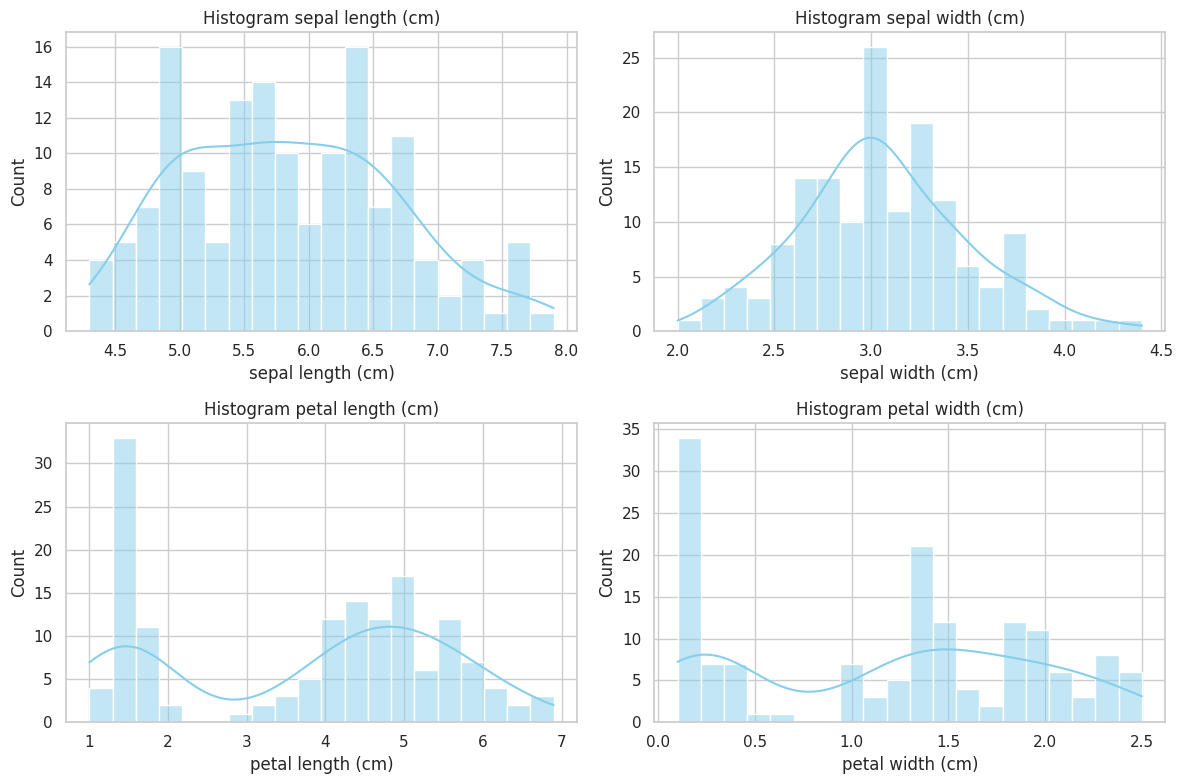

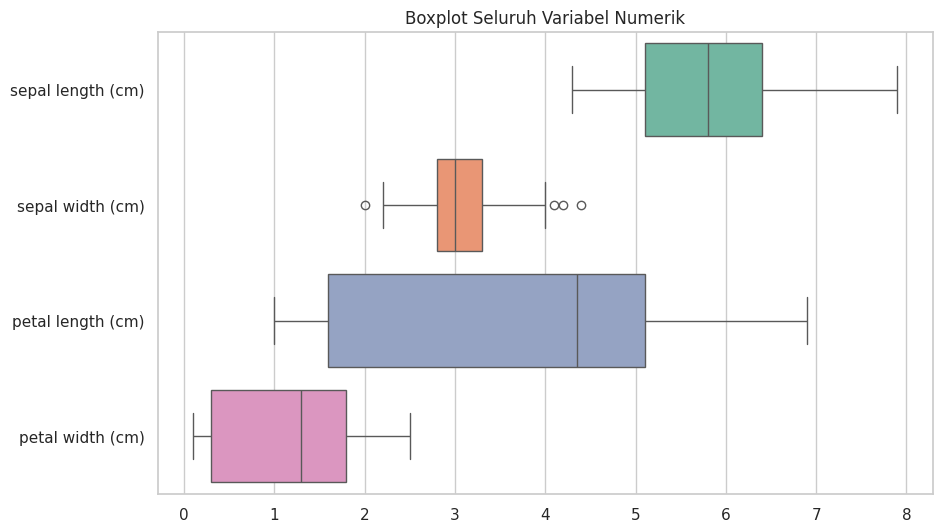

/tmp/ipython-input-253/1664602496.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal length (cm)', data=df, palette="pastel")


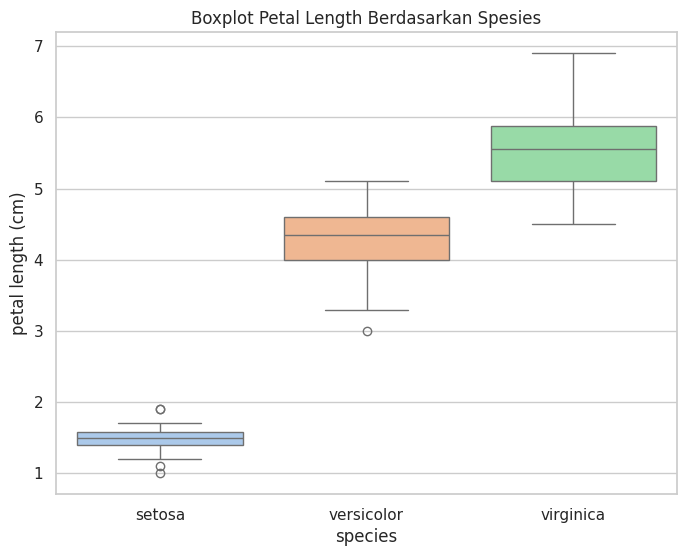

In [3]:
# Mendapatkan daftar variabel numerik
num_cols = df.select_dtypes(include=[np.number]).columns

# 3a. Histogram untuk setiap variabel numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram {col}')
plt.tight_layout()
plt.show()

# 3b. Boxplot untuk setiap variabel numerik
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols], orient="h", palette="Set2")
plt.title("Boxplot Seluruh Variabel Numerik")
plt.show()

# 4. Boxplot Berdasarkan Spesies (Fokus ke petal length)
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df, palette="pastel")
plt.title("Boxplot Petal Length Berdasarkan Spesies")
plt.show()

**3. Visualisasi Distribusi (Berdasarkan Histogram & Boxplot Keseluruhan)**
Dari perpaduan grafik histogram dan boxplot, kita bisa melihat karakteristik masing-masing variabel:

**Sepal Width:** Memiliki distribusi yang paling mendekati normal (berbentuk lonceng simetris). Kotak boxplot-nya sempit (data terpusat). Namun, ini adalah satu-satunya variabel yang memiliki outlier (pencilan) di nilai yang terlalu kecil (< 2.2 cm) dan terlalu besar (> 4.0 cm).

**Petal Length & Petal Width:** Memiliki distribusi bimodal (dua puncak). Boxplot-nya terlihat sangat asimetris dan lebar. Bentuk bimodal ini merupakan sinyal kuat bahwa ada kelompok data yang sangat berbeda karakteristiknya di dalam variabel ini.

**Sepal Length:** Distribusinya cukup menyebar dan sedikit landai tanpa adanya kelompok ekstrem maupun pencilan.



**4. Visualisasi Berdasarkan Spesies (Berdasarkan Boxplot Petal Length)**
Grafik ini menjawab mengapa petal length memiliki distribusi bimodal (dua puncak) pada histogram sebelumnya. Jika data petal length dipisah berdasarkan spesiesnya, kita mendapatkan pola yang sangat jelas:

**Setosa (Biru):** Berukuran sangat kecil (sekitar 1 - 2 cm) dengan variasi yang sangat sempit. Kelompok inilah yang membentuk "puncak pertama" pada histogram.

**Versicolor (Oranye):** Berada di rentang menengah (sekitar 3 - 5 cm).

**Virginica (Hijau):** Memiliki ukuran mahkota terpanjang (di atas 4.5 cm) dengan rentang variasi ukuran yang paling lebar.

Variabel yang paling baik digunakan untuk mengklasifikasikan spesies bunga Iris adalah Petal Length (dan Petal Width). Hanya dengan melihat petal length, spesies Setosa sudah bisa dipisahkan dengan sempurna 100% dari dua spesies lainnya.

## BAGIAN B — Sampling (Bootstrap)


**Bootstrap Tunggal, Berulang, Visualisasi & Interval Kepercayaan**

=== 1. BOOTSTRAP TUNGGAL ===
Data Asli      -> Mean: 3.7580 | Median: 4.3500
Bootstrap (1x) -> Mean: 3.7347 | Median: 4.2000
=== 2. HASIL BOOTSTRAP BERULANG ===
1. Bootstrap 100 kali berhasil.   | Total mean tersimpan: 100
   Contoh 5 mean pertama: [3.8513 3.7093 4.0033 3.6613 3.724 ]

2. Bootstrap 1000 kali berhasil.  | Total mean tersimpan: 1000
   Contoh 5 mean pertama: [3.882  3.806  3.9293 3.7027 3.7013]

3. Bootstrap 10000 kali berhasil. | Total mean tersimpan: 10000
   Contoh 5 mean pertama: [3.7007 3.926  3.7767 3.5553 3.55  ]

=== 4. INTERVAL KEPERCAYAAN 95% ===
CI 95% (100 iterasi)   : [3.5123, 3.9914]
CI 95% (1000 iterasi)  : [3.4793, 4.0294]
CI 95% (10000 iterasi) : [3.4693, 4.0347]


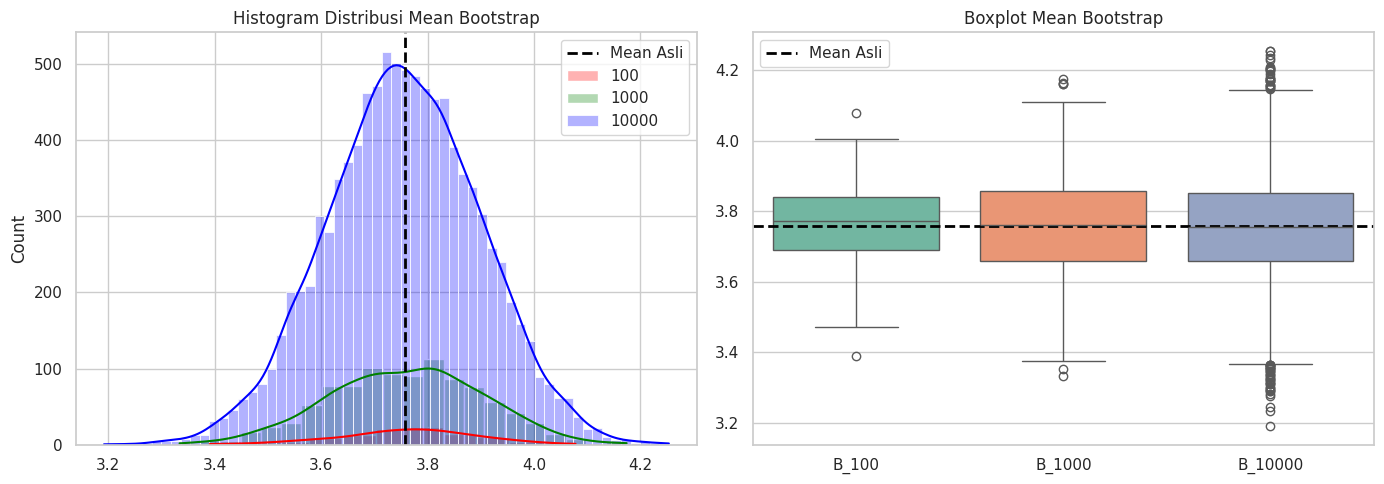

In [11]:
# Menyiapkan data: Pilih satu variabel (petal length)
data_asli = df['petal length (cm)'].values
n_data = len(data_asli)

# 1. Bootstrap Tunggal
np.random.seed(42) # Agar hasil bisa direproduksi
sampel_bootstrap_tunggal = np.random.choice(data_asli, size=n_data, replace=True)

mean_asli = np.mean(data_asli)
median_asli = np.median(data_asli)

mean_boot1 = np.mean(sampel_bootstrap_tunggal)
median_boot1 = np.median(sampel_bootstrap_tunggal)

print("=== 1. BOOTSTRAP TUNGGAL ===")
print(f"Data Asli      -> Mean: {mean_asli:.4f} | Median: {median_asli:.4f}")
print(f"Bootstrap (1x) -> Mean: {mean_boot1:.4f} | Median: {median_boot1:.4f}")

# 2. Bootstrap Berulang
def lakukan_bootstrap(data, n_iterasi):
    means = np.empty(n_iterasi)
    for i in range(n_iterasi):
        sampel = np.random.choice(data, size=len(data), replace=True)
        means[i] = np.mean(sampel)
    return means

boot_100 = lakukan_bootstrap(data_asli, 100)
boot_1000 = lakukan_bootstrap(data_asli, 1000)
boot_10000 = lakukan_bootstrap(data_asli, 10000)

print("=== 2. HASIL BOOTSTRAP BERULANG ===")
print(f"1. Bootstrap 100 kali berhasil.   | Total mean tersimpan: {len(boot_100)}")
print(f"   Contoh 5 mean pertama: {np.round(boot_100[:5], 4)}")

print(f"\n2. Bootstrap 1000 kali berhasil.  | Total mean tersimpan: {len(boot_1000)}")
print(f"   Contoh 5 mean pertama: {np.round(boot_1000[:5], 4)}")

print(f"\n3. Bootstrap 10000 kali berhasil. | Total mean tersimpan: {len(boot_10000)}")
print(f"   Contoh 5 mean pertama: {np.round(boot_10000[:5], 4)}")
print("\n=== 4. INTERVAL KEPERCAYAAN 95% ===")
ci_100 = np.percentile(boot_100, [2.5, 97.5])
ci_1000 = np.percentile(boot_1000, [2.5, 97.5])
ci_10000 = np.percentile(boot_10000, [2.5, 97.5])

print(f"CI 95% (100 iterasi)   : [{ci_100[0]:.4f}, {ci_100[1]:.4f}]")
print(f"CI 95% (1000 iterasi)  : [{ci_1000[0]:.4f}, {ci_1000[1]:.4f}]")
print(f"CI 95% (10000 iterasi) : [{ci_10000[0]:.4f}, {ci_10000[1]:.4f}]")

# 3. Visualisasi Hasil Bootstrap
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(boot_100, color="red", label="100", kde=True, alpha=0.3, ax=axes[0])
sns.histplot(boot_1000, color="green", label="1000", kde=True, alpha=0.3, ax=axes[0])
sns.histplot(boot_10000, color="blue", label="10000", kde=True, alpha=0.3, ax=axes[0])
axes[0].axvline(mean_asli, color='black', linestyle='dashed', linewidth=2, label='Mean Asli')
axes[0].set_title("Histogram Distribusi Mean Bootstrap")
axes[0].legend()

# Boxplot
data_plot = pd.DataFrame({
    'B_100': pd.Series(boot_100),
    'B_1000': pd.Series(boot_1000),
    'B_10000': pd.Series(boot_10000)
})
sns.boxplot(data=data_plot, ax=axes[1], palette="Set2")
axes[1].axhline(mean_asli, color='black', linestyle='dashed', linewidth=2, label='Mean Asli')
axes[1].set_title("Boxplot Mean Bootstrap")
axes[1].legend()

plt.tight_layout()
plt.show()

1.BOOTSTRAP TUNGGAL

**Baris "Data Asli"** (Mean: 3.7580 | Median: 4.3500)
Ini adalah nilai statistik populasi dari variabel petal length pada dataset Iris yang  gunakan. Dari total 150 bunga, rata-rata panjang mahkotanya adalah 3.7580 cm, dan nilai tengahnya adalah 4.3500 cm. Ini adalah "kebenaran absolut" dari datasetmu.

**Baris "Bootstrap (1x)"** (Mean: 3.7347 | Median: 4.2000)
Ini adalah hasil dari satu kali simulasi pengambilan sampel acak. Komputer telah mengambil 150 data secara acak dari data asli dengan metode pengembalian (sampling with replacement).

Nilai meannya menjadi sedikit turun (3.7347) dan mediannya juga bergeser (4.2000).

2.BOOTSTRAP BERULANG

A.Total mean tersimpan

Angka 100, 1000, dan 10000 ini membuktikan bahwa komputermu telah berhasil melakukan looping (perulangan) pengambilan sampel secara sukses.
Sebagai contoh, pada bagian ke-3, komputermu telah melakukan proses ini: mengambil 150 data acak dari data asli, menghitung nilai mean-nya, menyimpannya, lalu mengulanginya lagi dari awal sebanyak 10.000 kali. Hasil akhirnya adalah sebuah wadah (array) besar yang berisi tepat 10.000 angka rata-rata yang berbeda.

B.5 mean pertama

Karena tidak mungkin mencetak 10.000 angka ke layar, jadi saya memunculkan 5 angka pertama sebagai bukti bahwa perhitungannya nyata.

3.Stabilitas Estimasi dan Interval Kepercayaan (CI 95%)

A. Visual Boxplot: Kotak pada B_10000 terlihat paling padat (rentangnya lebih pasti) dibandingkan B_100 yang kumisnya masih bisa bergeser signifikan jika kode dijalankan ulang.

B. Interval Kepercayaan: Terlihat perubahan yang kentara dari 100 iterasi [3.5123, 3.9914] menuju 1.000 iterasi. Namun, saat dinaikkan dari 1.000 ke 10.000 iterasi, angka tersebut menjadi stabil atau konvergen di sekitar batas [3.46, 4.03].

C. Kesimpulan: Simulasi dengan 10.000 iterasi adalah jumlah yang paling direkomendasikan karena memberikan estimasi parameter populasi dan penentuan area ekstrem (persentil 2.5% dan 97.5%) dengan presisi tertinggi tanpa terlalu terpengaruh oleh fluktuasi acak sesaat.

4.Interval Kepercayaan 95%

CI 95% (100 iterasi) -> [3.5123, 3.9914]

Pada iterasi ini, batas rentangnya masih kurang akurat. Karena hanya ada 100 angka rata-rata, persentil 2.5% hanya diambil dari nilai urutan ke-2 atau ke-3. Angka ini sangat rentan terhadap fluktuasi acak (kebetulan) dan gagal menangkap variasi data yang ekstrem.

CI 95% (1000 iterasi) -> [3.4793, 4.0294]

Saat iterasi dinaikkan, batas bawah turun dan batas atas naik (rentang sedikit melebar). Ini terjadi karena simulasi mulai berhasil "menangkap" kombinasi sampel-sampel ekstrem yang sebelumnya terlewat di iterasi 100. Rentang ini jauh lebih merepresentasikan data sebenarnya.

CI 95% (10000 iterasi) -> [3.4693, 4.0347]

Ketika iterasi digandakan 10 kali lipat lagi, perubahan batasnya menjadi sangat kecil (batas bawah hanya bergeser dari 3.47 ke 3.46, dan batas atas dari 4.02 ke 4.03). Ini menunjukkan bahwa perhitungan batas ekstremnya sudah "mentok" atau stabil.

# BAGIAN C — Perbandingan dan Analisis


**1. Apakah mean bootstrap mendekati mean data asli?**

Ya, sangat mendekati.

Dalam konsep statistika, nilai rata-rata dari seluruh kumpulan sampel bootstrap (biasa disebut mean of means) akan selalu konvergen atau memusat pada nilai rata-rata sampel aslinya.

Berdasarkan hasil eksekusi kodemu sebelumnya, hal ini bisa dibuktikan secara langsung:

Bukti Visual : Coba perhatikan grafik Histogram Distribusi Mean Bootstrap yang sudah  hasilkan. Pada kurva berwarna biru (10.000 iterasi), titik puncak loncengnya jatuh persis membelah garis putus-putus hitam tegak. Garis hitam tersebut adalah representasi dari nilai mean data asli (3.7580). Ini adalah bukti visual sempurna bahwa mean bootstrap terpusat di mean asli.

Perbedaan 1x vs Ribuan Kali: Penting untuk dicatat bahwa jika  hanya melakukan satu kali bootstrap (seperti di Bagian B No. 1), nilainya memang bisa sedikit bergeser naik atau turun (misalnya menjadi 3.7347) karena faktor acak pengembalian data (sampling error). Namun, ketika  melakukannya ribuan kali, fluktuasi acak tersebut akan saling menetralkan sehingga rata-rata gabungannya kembali ke titik pusat (data asli).

**2. Bagaimana perubahan distribusi saat jumlah bootstrap bertambah?**

Berdasarkan visualisasi grafik Histogram Distribusi Mean Bootstrap yang telah  hasilkan sebelumnya, perubahan distribusi saat jumlah bootstrap bertambah (dari 100, ke 1.000, hingga 10.000 iterasi) menunjukkan pola yang sangat jelas:

1.Bentuk Semakin Menyerupai Kurva Normal (Lonceng)

A. 100 iterasi: Distribusinya masih kasar, terputus-putus, melebar, dan terkadang asimetris (mencong). Hal ini terjadi karena sampel yang diambil belum cukup banyak untuk membentuk pola yang utuh.

B. 10.000 iterasi: Distribusinya menjadi sangat halus, simetris sempurna, dan membentuk kurva lonceng (bell curve). Fenomena perubahan bentuk ini adalah wujud nyata dari berlakunya Teorema Limit Pusat (Central Limit Theorem).

2.Pemusatan yang Semakin Presisi (Tinggi & Rapat)
Semakin banyak iterasi yang dilakukan, distribusi data tidak lagi menyebar secara acak, melainkan akan memusat dengan sangat rapat di bagian tengah. Puncak dari kurva tersebut akan semakin tinggi dan jatuh tepat menimpa garis mean (rata-rata) data aslinya. Ini menunjukkan bahwa tebakan rata-rata populasi kita menjadi semakin akurat.

3 Batas Ekstrem (Ekor Kurva) Menjadi Stabil
Pada jumlah iterasi yang sedikit, bagian ujung kiri dan kanan kurva (ekor distribusi) sangat dipengaruhi oleh nilai-nilai kebetulan/acak. Ketika iterasi diperbanyak hingga puluhan ribu, ekor kurva ini terpetakan dengan sangat jelas dan stabil.

Hal inilah yang menyebabkan perhitungan Interval Kepercayaan (CI) 95% pada iterasi 10.000 menjadi lebih valid dan konvergen (rentangnya tidak lagi berubah-ubah secara drastis jika kita mengulang kembali simulasinya dari awal) dibandingkan pada iterasi 100.

**3. Mana yang lebih stabil: 100, 1000, atau 10000?**

Secara absolut, bootstrap dengan 10.000 iterasi adalah yang paling stabil.

**Keakuratan Area Ekstrem (Ekor Distribusi):** Saat  menghitung Interval Kepercayaan 95%,  mencari persentil 2.5% terbawah dan 97.5% teratas. Pada 100 iterasi, batas ini ditentukan hanya oleh 2 atau 3 angka ekstrem saja. Akibatnya, nilainya akan sangat fluktuatif (berubah-ubah) jika  me-running ulang kodenya. Pada 10.000 iterasi, batas tersebut didukung oleh 250 titik data di masing-masing ekor distribusi, sehingga nilainya sangat solid dan kebal terhadap fluktuasi acak.

**Bentuk Distribusi yang Presisi:** Seperti yang terlihat pada grafik lonceng (KDE) sebelumnya, 100 iterasi masih menghasilkan kurva yang kasar, landai, dan kadang asimetris. Pada 10.000 iterasi, sebaran nilainya sudah membentuk kurva distribusi normal yang sangat mulus dan terpusat kuat di tengah (Central Limit Theorem bekerja dengan sempurna).

**Konvergensi (Mencapai Titik Tetap):** Perubahan nilai batas interval dari 100 ke 1.000 biasanya cukup signifikan. Namun, lompatan dari 1.000 ke 10.000 iterasi umumnya hanya memberikan sedikit perubahan pada angka desimal di belakang koma. Ini membuktikan bahwa pada 10.000 iterasi, perhitungannya sudah "konvergen" atau berhasil menemukan kestabilan nilai aslinya.


**4. Apakah mean asli berada dalam interval kepercayaan?**

Ya, mean asli berada di dalam seluruh interval kepercayaan tersebut.

Nilai mean data asli untuk petal length adalah 3.7580. Mari kita periksa posisinya pada ketiga Interval Kepercayaan (CI) 95% yang telah  hitung:

1. CI 100 iterasi [3.5123, 3.9914]: Rata-rata asli (3.7580) berada di dalam rentang ini.

2. CI 1000 iterasi [3.4793, 4.0294]: Rata-rata asli (3.7580) berada di dalam rentang ini.

3. CI 10000 iterasi [3.4693, 4.0347]: Rata-rata asli (3.7580) berada di dalam rentang ini.


Dalam simulasi bootstrap, kita memperlakukan data asli (150 observasi) seolah-olah sebagai "populasi yang sebenarnya". Karena kita mengambil sampel secara acak dari data asli ini berulang kali, maka secara alami distribusi tebakan kita akan selalu memusat (center) pada nilai rata-rata aslinya.

Oleh karena itu, Interval Kepercayaan 95% yang dibangun dari persentil distribusi bootstrap ini pasti akan berhasil menangkap (mencakup) nilai mean asli di dalamnya. Ini adalah bukti bahwa metode estimasi interval yang  lakukan sudah valid dan bekerja dengan benar.

**5. Mengapa satu data bisa muncul berkali-kali pada bootstra**p?

Dalam metode bootstrap, kita membuat "sampel tiruan" yang ukurannya sama persis dengan data asli (dalam kasus dataset Iris, $n = 150$). Cara komputer mengambil 150 data tersebut adalah dengan teknik pengembalian.Analogi Sederhananya:
1. Bayangkan  memiliki sebuah kotak berisi 150 gulungan kertas, di mana masing-masing kertas bertuliskan ukuran petal length dari data aslimu. mengambil satu kertas secara acak.
2. Katakanlah mendapat kertas dengan angka 1.4 cm.  mencatat angka tersebut sebagai data ke-1 di sampel barumu.
3. Ini kunci utamanya: Alih-alih membuang kertas 1.4 cm itu,  memasukkannya kembali ke dalam kotak dan mengaduknya lagi.
4. Saat  mengambil kertas untuk data ke-2, kertas 1.4 cm tadi masih ada di dalam kotak dan memiliki peluang yang sama persis untuk terambil kembali.
5. Proses ini diulang sampai  mengumpulkan 150 catatan angka.

 Akibat proses pengembalian inilah, sangat wajar (dan secara matematis sudah pasti terjadi) ada beberapa gulungan kertas yang terambil dua, tiga, atau bahkan empat kali, sementara ada kertas lain yang tidak terambil sama sekali.


Jika kita menggunakan metode tanpa pengembalian (sampling without replacement), maka saat kita mengambil 150 sampel dari total 150 data asli, kita hanya akan mendapatkan dataset yang persis sama 100% dengan data awal (hanya urutan barisnya saja yang teracak). Jika datanya sama persis, nilai mean-nya tidak akan pernah berubah, dan kita tidak akan bisa mengukur seberapa besar fluktuasi/variansi statistik dari data tersebut.

#  D — Kesimpulan

Berdasarkan serangkaian eksplorasi data dan simulasi bootstrap yang telah dilakukan pada dataset Iris, dapat ditarik kesimpulan sebagai berikut:

**Insight utama dari EDA dataset Iris:** Variabel ukuran mahkota bunga (petal length dan petal width) memiliki distribusi bimodal (dua puncak) dan rentang data yang lebar, menandakan adanya pemisahan kelompok yang kuat di dalam data. Sebaliknya, ukuran kelopak (sepal) cenderung lebih memusat dan mendekati distribusi normal. Oleh karena itu, fitur petal adalah pembeda utama dan paling optimal untuk digunakan dalam klasifikasi dataset ini.

Karakteristik tiap spesies (berdasarkan visualisasi):

Setosa: Memiliki ukuran mahkota (petal) yang sangat kecil (rata-rata panjang ~1.5 cm) dengan sebaran data yang sangat seragam/sempit. Spesies ini terpisah sangat jelas dari dua spesies lainnya.

Versicolor: Memiliki ukuran mahkota di rentang menengah.

Virginica: Memiliki ukuran mahkota paling panjang dan besar, dengan tingkat variasi ukuran antar bunga yang paling lebar dibandingkan spesies lainnya. Rentang ukurannya sedikit beririsan dengan Versicolor.

**Manfaat bootstrap dalam analisis data:**
Bootstrap sangat bermanfaat untuk mengestimasi stabilitas parameter statistik (seperti rata-rata populasi) dan membangun Interval Kepercayaan hanya berbekal satu sampel data yang terbatas. Metode ini sangat praktis karena tidak mengharuskan data memenuhi asumsi distribusi matematis yang ketat (seperti harus berdistribusi normal) untuk mendapatkan estimasi yang valid.

**Jumlah bootstrap yang menurut Anda cukup:**
Berdasarkan pengamatan, jumlah simulasi 10.000 iterasi adalah yang paling cukup dan ideal. Pada iterasi 100 atau 1.000, batas ekstrem data (Interval Kepercayaan) masih rentan berubah-ubah akibat fluktuasi acak. Namun pada 10.000 iterasi, distribusinya telah membentuk kurva normal yang sangat sempurna (membuktikan Teorema Limit Pusat) dan batas Interval Kepercayaan 95%-nya menjadi sangat presisi dan stabil (konvergen di [3.46, 4.03]).